# Final Project

1. Import packages
2. Scrape text
3. Clean text (main)
4. Get/Create features
5. Get/Create key features
6. Visualise data
7. Split data
8. Build model

## Import packages

In [0]:
#import scrapy
import pandas as pd
import scipy as sp
import datetime
from dateutil import parser
import math
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
from collections import Counter
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from sklearn import model_selection, metrics, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import linear_model, svm
import lightgbm
from nltk.tokenize import TreebankWordTokenizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import datetime
import numpy as np
from keras.callbacks import EarlyStopping
import glob, random, re, inspect, pickle, os
from random import sample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline, make_union
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Embedding, LSTM, Activation, Flatten, Conv1D, GlobalMaxPooling1D, Dropout, Concatenate
from keras.utils import to_categorical, np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from IPython.core.display import display, HTML
from gensim.models import KeyedVectors
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PW\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
start = datetime.datetime.now()

In [0]:
source_data = pd.read_csv('OnlineNewsPopularity.csv')

## Scrape text (to skip this portion when rerunning the codes)

In [0]:
BOT_NAME = 'mlproject'

SPIDER_MODULES = ['mlproject.spiders']
NEWSPIDER_MODULE = 'mlproject.spiders'

ROBOTSTXT_OBEY = False

FEED_FORMAT = "csv"
FEED_URI = "data_mashable3.csv"

In [0]:
class MlprojectSpider(scrapy.Spider):
    name = 'mlproject'
    allowed_domains = ['www.mashable.com']
    start_urls = list(source_data['url'])
    
    def parse(self, response):
            #Extracting the content using css selectors
            datetime = response.css("time::attr(datetime)").extract()
            content = response.css(".article-content").extract()
            topics = response.css(".article-topics").extract()
            website = response.xpath("//meta/@content")[12:13].extract()
            title = response.xpath("//meta/@content")[13:14].extract()
            
            #Give the extracted content row wise
            for item in zip(title,topics,content,datetime,website):
                #create a dictionary to store the scraped info
                scraped_info = {
                    'title' : item[0],
                    'topics' : item[1],
                    'content' : item[2],
                    'datetime' : item[3],
                    'website' : item[4]
                }
        
                #yield or give the scraped info to scrapy
                yield scraped_info

## Clean text (main)

In [0]:
scraped_data = pd.read_csv("fulldatacleaned.csv", encoding='utf-8')

In [0]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    return words

def data_to_words( raw_text ):
    # 1. Remove HTML
    data_text = BeautifulSoup(raw_text).get_text() 
    
    # 2. Convert to lower case, split into individual words
    words = data_text.lower().split()  
    
    words = normalize(words)
    
    return( " ".join(words)) 

In [0]:
clean_topics = []

for i in range(0, scraped_data['topics'].size ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_topics.append( data_to_words( scraped_data['topics'][i] ) )

clean_content = []

for i in range(0, scraped_data['content'].size ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_content.append( data_to_words( scraped_data['content'][i] ) )
    
clean_title = []

for i in range(0, scraped_data['title'].size ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_title.append( data_to_words( scraped_data['title'][i] ) )

final_Outcome = scraped_data[['title', 'datetime', 'website','check']]
final_Outcome['Clean_topics'] = clean_topics
final_Outcome['Clean_content'] = clean_content
final_Outcome['Clean_title'] = clean_title



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
dataframe = final_Outcome

all_topics = []
for i in dataframe.Clean_topics:
    for j in i.split(" "):
        all_topics.append(j)
print(len(all_topics))


#Getting the frequency of the tags of the articles
keywords_base = pd.DataFrame(all_topics)
keywords_base.columns = ['words']

keywords_freq = keywords_base.groupby('words').agg({'words': ['count']})
keywords_freq = keywords_freq.reset_index()
keywords_freq.columns = ['word', 'count']

print(keywords_freq.head(5))

#Creating a dictionary - Word: Count for faster recall and calculation
words = keywords_freq['word'].tolist()
count = keywords_freq['count'].tolist()
max = len(words) - 1
i = 0
word_dict = {}
while i <= max:
    word_dict[words[i]] = count[i]
    i = i + 1

#Removal of keywords that are too frequent (the cut off is identified via a distribution plot). This is done by a creation of a "stopword" list
stopwords = keywords_freq[(keywords_freq['count'] >= 600)]
stopwordlist = stopwords['word'].tolist()


# Taking the average repitition score of the tags - the higher the score, the less unique it is (many articles with similar tags
def Average(lst): 
    return sum(lst) / len(lst) 

def repititionscore(row):
    x = row['Clean_topics']
    keywords = str(x).split(' ')
    counter = 0
    test = []
    for i in keywords:
        if i in stopwordlist:
            next
        else:
            test.append(word_dict[i])
    if len(test) == 0:
        value = 600
    else:
        value = Average(test)
    return value


dataframe['keywords'] = dataframe.apply(repititionscore, axis=1)

final_Outcome = dataframe

final_Outcome.to_csv("Clean_Data.csv", index=False)

328326
   word  count
0   007      2
1     1     11
2    10    109
3   100      4
4  1000      1


## Get/Create features

In [0]:
content_data = pd.read_csv('Clean_Data.csv')

In [0]:
##### join some source data to content_data #####

for i in range(len(source_data)):
    source_data['url'][i] = source_data['url'][i].replace('http', 'https', 1)

content_with_source = content_data.merge(source_data[['url',
                                                      ' shares',
                                                      ' n_tokens_title', #num words in title
                                                      ' n_tokens_content', #num words in content
                                                      ' n_non_stop_unique_tokens', #rate of non-stopword unique words in content
                                                      ' num_self_hrefs', #num links to other Mashable articles
                                                      ' num_imgs', #num images
                                                      ' num_videos', #num videos
                                                      ' average_token_length', #avg length of words in content
                                                      ' data_channel_is_lifestyle',
                                                      ' data_channel_is_entertainment',
                                                      ' data_channel_is_bus',
                                                      ' data_channel_is_socmed',
                                                      ' data_channel_is_tech',
                                                      ' data_channel_is_world',
                                                      ' is_weekend',
                                                      ' LDA_00', #closeness to topic0
                                                      ' LDA_01', #closeness to topic1
                                                      ' LDA_02', #closeness to topic2
                                                      ' LDA_03', #closeness to topic3
                                                      ' LDA_04', #closeness to topic4
                                                      ' global_subjectivity', #text subjectivity
                                                      ' global_sentiment_polarity', #text sentiment polarity
                                                      ' global_rate_positive_words', #rate of positive words in content
                                                      ' global_rate_negative_words', #rate of negative words in content
                                                      ' rate_positive_words', #rate of positive words among non-neutral tokens
                                                      ' rate_negative_words', #rate of negative words among non-neutral tokens
                                                      ' avg_positive_polarity',
                                                      ' min_positive_polarity',
                                                      ' max_positive_polarity',
                                                      ' avg_negative_polarity',
                                                      ' min_negative_polarity',
                                                      ' max_negative_polarity',
                                                      ' title_subjectivity',
                                                      ' title_sentiment_polarity',
                                                      ' abs_title_subjectivity',
                                                      ' abs_title_sentiment_polarity'
                                                    ]], 
                                         left_on = 'website', 
                                         right_on = 'url', 
                                         how = 'left')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
content_with_source = content_with_source.dropna()
content_with_source = content_with_source.reset_index()

In [0]:
##### get selected features and create new features from source_data #####

content_with_source['dt'] = None
content_with_source['week_of_year'] = None
content_with_source['day_of_week'] = None
content_with_source['hour_of_day'] = None
content_with_source['xhr'] = None
content_with_source['yhr'] = None
content_with_source['xday'] = None
content_with_source['yday'] = None
content_with_source['xwk'] = None
content_with_source['ywk'] = None

for i in range(len(content_with_source)):
    
    content_with_source['dt'][i] = parser.parse(content_with_source['datetime'][i])
    
    content_with_source['week_of_year'][i] = content_with_source['dt'][i].isocalendar()[1]
    content_with_source['day_of_week'][i] = content_with_source['dt'][i].weekday()
    content_with_source['hour_of_day'][i] = content_with_source['dt'][i].hour
    
    content_with_source['xhr'][i] = math.sin(2 * math.pi * content_with_source['hour_of_day'][i] / 24)
    content_with_source['yhr'][i] = math.cos(2 * math.pi * content_with_source['hour_of_day'][i] / 24)

    content_with_source['xday'][i] = math.sin(2 * math.pi * content_with_source['day_of_week'][i] / 7)
    content_with_source['yday'][i] = math.cos(2 * math.pi * content_with_source['day_of_week'][i] / 7)

    content_with_source['xwk'][i] = math.sin(2 * math.pi * content_with_source['week_of_year'][i] / 53)
    content_with_source['ywk'][i] = math.cos(2 * math.pi * content_with_source['week_of_year'][i] / 53)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: Settin

In [0]:
del content_with_source['dt']
del content_with_source['week_of_year']
del content_with_source['day_of_week']
del content_with_source['hour_of_day']

In [0]:
content_with_source['Clean_content2'] = content_with_source['Clean_content']
content_with_source['Clean_topics2'] = content_with_source['Clean_topics']
content_with_source['Clean_title2'] = content_with_source['Clean_title']

In [0]:
##### tokenize texts #####

for i in range(len(content_with_source)):
    content_with_source['Clean_content'][i] = nltk.word_tokenize(content_with_source['Clean_content'][i])
    content_with_source['Clean_topics'][i] = nltk.word_tokenize(content_with_source['Clean_topics'][i])
    content_with_source['Clean_title'][i] = nltk.word_tokenize(content_with_source['Clean_title'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

## Get/Create key features

In [0]:
def remove_non_ascii2(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def normalize2(words):
    words = remove_non_ascii2(words)
    return words

def data_to_words2( raw_text ):
    # 1. Remove HTML
    data_text = BeautifulSoup(raw_text).get_text() 
    
    # 2. Convert to lower case, split into individual words
    words = data_text.lower().split()  
    
    words = normalize2(words)
    
    return( " ".join(words)) 

scraped_data['content_lightcleaning'] = scraped_data['content'].apply(lambda x: data_to_words2(x))

In [0]:
content_with_source = content_with_source.merge(scraped_data[['website', 'content_lightcleaning']],
                                                left_on = 'website', 
                                                right_on = 'website', 
                                                how = 'left')

In [0]:
##### Num & % of Verbs and Average sentence length #####

content_with_source['num_verbs'] = None
content_with_source['prop_verbs'] = None
content_with_source['avg_sent_len'] = None

for i in range(len(content_with_source)):
    tokens = nltk.word_tokenize(scraped_data['content_lightcleaning'][i])
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word, tag in tags)
    content_with_source['num_verbs'][i] = counts['VB'] + counts['VBD'] + counts['VBG'] + counts['VBN'] + counts['VBP'] + counts['VBZ']
    content_with_source['prop_verbs'][i] = content_with_source['num_verbs'][i] / (sum(counts.values())+1)
    
    terminals = set([".", "?", "!"])
    terminal_count = 0

    for item in tokens:
        if item in terminals:
            terminal_count += 1
    
    content_with_source['avg_sent_len'][i] = (len(tokens) - terminal_count)  / (float(terminal_count)+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
##### Average word length and word syllable length #####

def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

content_with_source['avg_word_len'] = None
content_with_source['avg_word_syl'] = None

for i in range(len(content_with_source)):
    sentences = content_with_source['content_lightcleaning'][i]
    words = sentences.split()
    content_with_source['avg_word_len'][i] = sum(len(word) for word in words) / len(words)
    
    content_with_source['avg_word_syl'][i] = syllable_count(content_with_source['content_lightcleaning'][i]) / len(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
del content_with_source['content_lightcleaning']

## Visualise data

In [0]:
content_with_source.to_csv('content_with_source_final.csv', index = False)
content_with_source = pd.read_csv('content_with_source_final.csv')

In [0]:
content_with_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38188 entries, 0 to 38187
Data columns (total 60 columns):
index                             38188 non-null int64
title                             38188 non-null object
datetime                          38188 non-null object
website                           38188 non-null object
check                             38188 non-null object
Clean_topics                      38188 non-null object
Clean_content                     38188 non-null object
Clean_title                       38188 non-null object
keywords                          38188 non-null float64
url                               38188 non-null object
 shares                           38188 non-null float64
 n_tokens_title                   38188 non-null float64
 n_tokens_content                 38188 non-null float64
 n_non_stop_unique_tokens         38188 non-null float64
 num_self_hrefs                   38188 non-null float64
 num_imgs                         38188 non-nu

In [0]:
content_with_source.iloc[:,10:52] = content_with_source.iloc[:,10:52].astype(float)
content_with_source.iloc[:,55:] = content_with_source.iloc[:,55:].astype(float)
content_with_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38188 entries, 0 to 38187
Data columns (total 60 columns):
index                             38188 non-null int64
title                             38188 non-null object
datetime                          38188 non-null object
website                           38188 non-null object
check                             38188 non-null object
Clean_topics                      38188 non-null object
Clean_content                     38188 non-null object
Clean_title                       38188 non-null object
keywords                          38188 non-null float64
url                               38188 non-null object
 shares                           38188 non-null float64
 n_tokens_title                   38188 non-null float64
 n_tokens_content                 38188 non-null float64
 n_non_stop_unique_tokens         38188 non-null float64
 num_self_hrefs                   38188 non-null float64
 num_imgs                         38188 non-nu

In [0]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
    
    # visualize
    ax = plt.subplots(figsize=(5, 10))
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 

    plt.show()

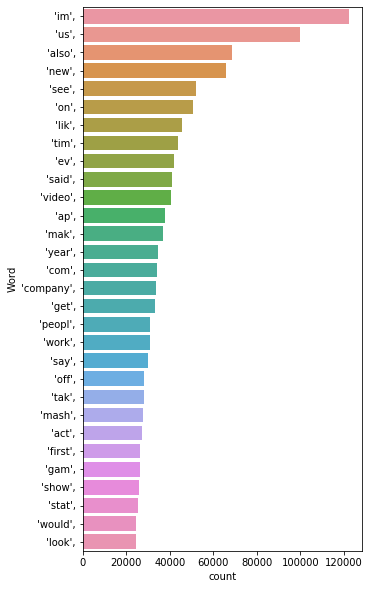

In [0]:
freq_words(content_with_source['Clean_content'], 30)

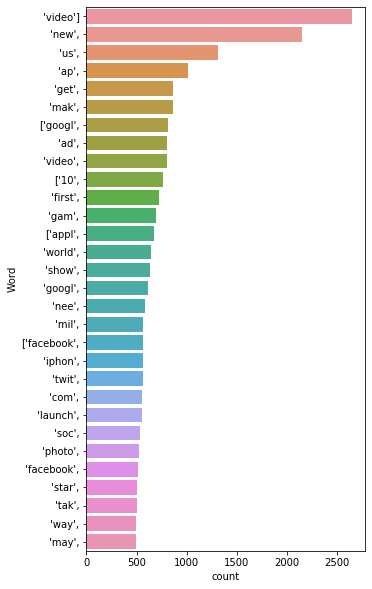

In [0]:
freq_words(content_with_source['Clean_title'], 30)

## Split data

In [0]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(content_with_source[['Clean_content',
                                                                                         'Clean_title',
                                                                                         'keywords',
                                                                                         ' num_self_hrefs', #num links to other Mashable articles
                                                                                         ' num_imgs', #num images
                                                                                         ' num_videos', #num videos
                                                                                         ' average_token_length', #avg length of words in content
                                                                                         ' LDA_00', #closeness to topic0
                                                                                         ' LDA_01', #closeness to topic1
                                                                                         ' LDA_02', #closeness to topic2
                                                                                         ' LDA_03', #closeness to topic3
                                                                                         ' LDA_04', #closeness to topic4
                                                                                         ' global_subjectivity', #text subjectivity
                                                                                         ' global_sentiment_polarity', #text sentiment polarity
                                                                                         ' global_rate_positive_words', #rate of positive words in content
                                                                                         ' global_rate_negative_words', #rate of negative words in content
                                                                                         ' rate_positive_words', #rate of positive words among non-neutral tokens
                                                                                         ' rate_negative_words', #rate of negative words among non-neutral tokens
                                                                                         ' avg_positive_polarity',
                                                                                         ' min_positive_polarity',
                                                                                         ' max_positive_polarity',
                                                                                         ' avg_negative_polarity',
                                                                                         ' min_negative_polarity',
                                                                                         ' max_negative_polarity',
                                                                                         ' title_subjectivity',
                                                                                         ' title_sentiment_polarity',
                                                                                         ' abs_title_subjectivity',
                                                                                         ' abs_title_sentiment_polarity',
                                                                                         'xhr',
                                                                                         'yhr',
                                                                                         'xday',
                                                                                         'yday',
                                                                                         'xwk',
                                                                                         'ywk',
                                                                                         'num_verbs',
                                                                                         'prop_verbs',
                                                                                         'avg_sent_len',
                                                                                         'avg_word_len',
                                                                                         'avg_word_syl'
                                                                                       ]], 
                                                                    content_with_source[' shares'], 
                                                                    test_size = 0.2,
                                                                    random_state = 0)

## Build model

In [0]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features = 5000)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features = 5000)

In [0]:
def model(vectorizer, regressor, para, n_iter, train_x = train_x, train_y = train_y, test_x = test_x, test_y = test_y):

    def get_content(data):
        return data.Clean_content
    
    get_content_ft = preprocessing.FunctionTransformer(get_content, validate = False)
    
    def get_title(data):
        return data.Clean_title
    
    get_title_ft = preprocessing.FunctionTransformer(get_title, validate = False)
    
    def source_features(data):
        return data.iloc[:,9:51]

    source_features_ft = preprocessing.FunctionTransformer(source_features, validate = False)
    
    def created_features(data):
        return data.iloc[:,54:]

    created_features_ft = preprocessing.FunctionTransformer(created_features, validate = False)
    
    union = make_union(make_pipeline(get_content_ft, vectorizer),
                       make_pipeline(get_title_ft, vectorizer),
                       source_features_ft,
                       created_features_ft)
    
    pipe = make_pipeline(union, regressor)
    
    rand = model_selection.RandomizedSearchCV(estimator = pipe, 
                                              param_distributions = para, 
                                              n_iter = n_iter,
                                              cv = 5, 
                                              scoring = 'neg_mean_absolute_error',
                                              random_state = 0)
    rand.fit(train_x, train_y)
    print(rand.best_score_)
    print(rand.best_params_)
    
    pred = rand.predict(test_x)
    
    return pred, metrics.mean_squared_error(test_y, pred) ** 0.5, metrics.mean_absolute_error(test_y, pred)

In [0]:
model_scores = []

### LR

In [0]:
%%time

para_lr = {}

pred_lr_count, rmse_lr_count, mae_lr_count = model(vectorizer = count_vect, 
                                                   regressor = linear_model.LinearRegression(), 
                                                   para = para_lr, 
                                                   n_iter = 1)

model_scores.append({'Model': 'LR_Count', 'Score_rmse': rmse_lr_count, 'Score_mae': mae_lr_count})

pred_lr_tfidf, rmse_lr_tfidf, mae_lr_tfidf = model(vectorizer = tfidf_vect, 
                                                   regressor = linear_model.LinearRegression(), 
                                                   para = para_lr, 
                                                   n_iter = 1)

model_scores.append({'Model': 'LR_TFIDF', 'Score_rmse': rmse_lr_tfidf, 'Score_mae': mae_lr_tfidf})

-8084.509856175125
{}
-7806.775200183727
{}
Wall time: 19min


In [0]:
pd.DataFrame(model_scores)

,Model,Score_mae,Score_rmse
0,LR_Count,6833.388988,13243.360096
1,LR_TFIDF,6730.356518,13028.044904


### SGD

In [0]:
%%time

para_sg = {'sgdregressor__random_state': [0],
           'sgdregressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
           'sgdregressor__learning_rate': ['constant', 'invscaling', 'adaptive', 'optimal'],
           'sgdregressor__eta0': [0.0001, 0.001, 0.01]
          }

pred_sg_count, rmse_sg_count, mae_sg_count = model(vectorizer = count_vect, 
                                                   regressor = linear_model.SGDRegressor(), 
                                                   para = para_sg, 
                                                   n_iter = 30)

model_scores.append({'Model': 'SG_Count', 'Score_rmse': rmse_sg_count, 'Score_mae': mae_sg_count})

pred_sg_tfidf, rmse_sg_tfidf, mae_sg_tfidf = model(vectorizer = tfidf_vect, 
                                                   regressor = linear_model.SGDRegressor(), 
                                                   para = para_sg, 
                                                   n_iter = 30)

model_scores.append({'Model': 'SG_TFIDF', 'Score_rmse': rmse_sg_tfidf, 'Score_mae': mae_sg_tfidf})

C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\

-2471.311975810051
{'sgdregressor__random_state': 0, 'sgdregressor__loss': 'epsilon_insensitive', 'sgdregressor__learning_rate': 'adaptive', 'sgdregressor__eta0': 0.01}


C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\PW\Anaconda3\lib\site-packages\sklearn\

-2462.7494553582655
{'sgdregressor__random_state': 0, 'sgdregressor__loss': 'epsilon_insensitive', 'sgdregressor__learning_rate': 'adaptive', 'sgdregressor__eta0': 0.01}
Wall time: 3h 21min 10s


In [0]:
pd.DataFrame(model_scores)

,Model,Score_mae,Score_rmse
0,LR_Count,6833.388988,13243.360096
1,LR_TFIDF,6730.356518,13028.044904
2,SG_Count,2277.045845,10518.914906
3,SG_TFIDF,2269.119618,10526.310680


### LGB

In [0]:
%%time

para_lg = {'lgbmregressor__random_state': [0],
           'lgbmregressor__num_leaves': [30, 50, 70],
           'lgbmregressor__max_depth': [-1, 10, 20],
           'lgbmregressor__learning_rate': [0.1, 0.01, 0.001],
           'lgbmregressor__min_child_samples': [10, 20, 30],
           'lgbmregressor__subsample': [0.9, 0.8],
           'lgbmregressor__colsample_bytree': [0.9, 0.8],
           'lgbmregressor__n_estimators': [500, 1000, 1500]
          }

pred_lg_count, rmse_lg_count, mae_lg_count = model(vectorizer = count_vect, 
                                                   regressor = lightgbm.LGBMRegressor(), 
                                                   para = para_lg, 
                                                   n_iter = 10)

model_scores.append({'Model': 'LG_Count', 'Score_rmse': rmse_lg_count, 'Score_mae': mae_lg_count})

pred_lg_tfidf, rmse_lg_tfidf, mae_lg_tfidf = model(vectorizer = tfidf_vect, 
                                                   regressor = lightgbm.LGBMRegressor(), 
                                                   para = para_lg, 
                                                   n_iter = 10)

model_scores.append({'Model': 'LG_TFIDF', 'Score_rmse': rmse_lg_tfidf, 'Score_mae': mae_lg_tfidf})

-3203.8183126514805
{'lgbmregressor__subsample': 0.9, 'lgbmregressor__random_state': 0, 'lgbmregressor__num_leaves': 50, 'lgbmregressor__n_estimators': 1000, 'lgbmregressor__min_child_samples': 20, 'lgbmregressor__max_depth': -1, 'lgbmregressor__learning_rate': 0.001, 'lgbmregressor__colsample_bytree': 0.8}
-3221.1997243761
{'lgbmregressor__subsample': 0.9, 'lgbmregressor__random_state': 0, 'lgbmregressor__num_leaves': 50, 'lgbmregressor__n_estimators': 1000, 'lgbmregressor__min_child_samples': 20, 'lgbmregressor__max_depth': -1, 'lgbmregressor__learning_rate': 0.001, 'lgbmregressor__colsample_bytree': 0.8}
Wall time: 13h 33min 13s


In [0]:
pd.DataFrame(model_scores)

,Model,Score_mae,Score_rmse
0,LR_Count,6833.388988,13243.360096
1,LR_TFIDF,6730.356518,13028.044904
2,SG_Count,2277.045845,10518.914906
3,SG_TFIDF,2269.119618,10526.310680
4,LG_Count,3050.565204,10401.496782
5,LG_TFIDF,3036.546127,10373.306543


### SVM

In [0]:
%%time

para_sv = {}

pred_sv_count, rmse_sv_count, mae_sv_count = model(vectorizer = count_vect, 
                                                   regressor = svm.NuSVR(), 
                                                   para = para_sv, 
                                                   n_iter = 1)

model_scores.append({'Model': 'SV_Count', 'Score_rmse': rmse_sv_count, 'Score_mae': mae_sv_count})

pred_sv_tfidf, rmse_sv_tfidf, mae_sv_tfidf = model(vectorizer = tfidf_vect, 
                                                   regressor = svm.NuSVR(), 
                                                   para = para_sv, 
                                                   n_iter = 1)

model_scores.append({'Model': 'SV_TFIDF', 'Score_rmse': rmse_sv_tfidf, 'Score_mae': mae_sv_tfidf})

-2529.566131317732
{}
-2529.8513710217326
{}
Wall time: 4h 48min 38s


In [0]:
pd.DataFrame(model_scores)

,Model,Score_mae,Score_rmse
0,LR_Count,6833.388988,13243.360096
1,LR_TFIDF,6730.356518,13028.044904
2,SG_Count,2277.045845,10518.914906
3,SG_TFIDF,2269.119618,10526.310680
4,LG_Count,3050.565204,10401.496782
5,LG_TFIDF,3036.546127,10373.306543
6,SV_Count,2338.631621,10468.206060
7,SV_TFIDF,2338.958659,10468.058485


In [0]:
end = start = datetime.datetime.now()
print(end - start)

### Word Embedding + Neural Network

In [0]:
all_data = pd.read_csv('content_with_source_final.csv')

In [0]:
all_data.head()

,index,title,datetime,website,check,Clean_topics,Clean_content,Clean_title,keywords,url,...,xwk,ywk,Clean_content2,Clean_topics2,Clean_title2,num_verbs,prop_verbs,avg_sent_len,avg_word_len,avg_word_syl
0,0,Ask a Dev: What's 'Tap and Pay' in Android Kit...,"Mon, 18 Nov 2013 16:15:23 +0000",https://mashable.com/2013/11/18/ask-a-dev-andr...,Mon,"['top', 'android', 'android', 'kitk', 'ap', 's...","['new', 'android', 'kitk', 'feat', 'cal', 'tap...","['ask', 'dev', 'what', 'tap', 'pay', 'android'...",193.750000,https://mashable.com/2013/11/18/ask-a-dev-andr...,...,-0.652822,0.757511,new android kitk feat cal tap pay let buy thin...,top android android kitk ap softw ask dev dev ...,ask dev what tap pay android kitk,51,0.149123,25.307692,4.648026,1.595395
1,1,Exoplanets Explain Why the 'Dark Side' of the ...,"Mon, 16 Jun 2014 13:15:08 +0000",https://mashable.com/2014/06/16/farside-of-the...,Mon,"['top', 'dark', 'sid', 'moon', 'moon', 'spac',...","['heat', 'rady', 'young', 'ear', 'could', 'hel...","['exoplanet', 'explain', 'dark', 'sid', 'moon'...",51.500000,https://mashable.com/2014/06/16/farside-of-the...,...,0.176890,-0.984231,heat rady young ear could help solv 50yearold ...,top dark sid moon moon spac world,exoplanet explain dark sid moon fac,123,0.132686,24.750000,4.897883,1.607721
2,2,This App Helps You Say Goodbye to Boring Convo...,"Mon, 04 Aug 2014 03:57:36 +0000",https://mashable.com/2014/08/03/this-app-can-h...,Mon,"['top', 'ap', 'softw', 'gadget', 'hardw', 'mob...",['playerdescriptionnullimagehttpsmondrianmasha...,"['ap', 'help', 'say', 'goodby', 'bor', 'convo'...",27.000000,https://mashable.com/2014/08/03/this-app-can-h...,...,-0.606800,-0.794854,playerdescriptionnullimagehttpsmondrianmashabl...,top ap softw gadget hardw mobl soc tech,ap help say goodby bor convo push button,78,0.098113,30.800000,7.995110,2.151589
3,3,Filming of New 'Star Wars' Movie to Begin in May,"Mon, 20 Jan 2014 13:33:51 +0000",https://mashable.com/2014/01/20/star-wars-may-...,Mon,"['top', 'lucasfilm', 'star', 'war']","['direct', 'jj', 'abram', 'say', 'script', 'ne...","['film', 'new', 'star', 'war', 'movy', 'begin'...",249.333333,https://mashable.com/2014/01/20/star-wars-may-...,...,0.456629,0.889657,direct jj abram say script next star war movy ...,top lucasfilm star war,film new star war movy begin may,34,0.182796,22.250000,4.566879,1.464968
4,4,Come and Give Turntable.fm the Sendoff It Dese...,"Mon, 02 Dec 2013 21:10:11 +0000",https://mashable.com/2013/12/02/turntable-shut...,Mon,"['top', 'commun', 'mus', 'soc', 'med', 'turnta...","['monday', 'last', 'chant', 'ris', 'temp', 'st...","['com', 'giv', 'turntablefm', 'sendoff', 'dese...",74.000000,https://mashable.com/2013/12/02/turntable-shut...,...,-0.456629,0.889657,monday last chant ris temp stardom virt dj hel...,top commun mus soc med turntablefm,com giv turntablefm sendoff deserv,31,0.154229,24.125000,4.730337,1.556180


In [0]:
all_data=all_data.drop('index', axis=1)

In [0]:
all_data.head()

,title,datetime,website,check,Clean_topics,Clean_content,Clean_title,keywords,url,shares,...,xwk,ywk,Clean_content2,Clean_topics2,Clean_title2,num_verbs,prop_verbs,avg_sent_len,avg_word_len,avg_word_syl
0,Ask a Dev: What's 'Tap and Pay' in Android Kit...,"Mon, 18 Nov 2013 16:15:23 +0000",https://mashable.com/2013/11/18/ask-a-dev-andr...,Mon,"['top', 'android', 'android', 'kitk', 'ap', 's...","['new', 'android', 'kitk', 'feat', 'cal', 'tap...","['ask', 'dev', 'what', 'tap', 'pay', 'android'...",193.750000,https://mashable.com/2013/11/18/ask-a-dev-andr...,2600.0,...,-0.652822,0.757511,new android kitk feat cal tap pay let buy thin...,top android android kitk ap softw ask dev dev ...,ask dev what tap pay android kitk,51,0.149123,25.307692,4.648026,1.595395
1,Exoplanets Explain Why the 'Dark Side' of the ...,"Mon, 16 Jun 2014 13:15:08 +0000",https://mashable.com/2014/06/16/farside-of-the...,Mon,"['top', 'dark', 'sid', 'moon', 'moon', 'spac',...","['heat', 'rady', 'young', 'ear', 'could', 'hel...","['exoplanet', 'explain', 'dark', 'sid', 'moon'...",51.500000,https://mashable.com/2014/06/16/farside-of-the...,1500.0,...,0.176890,-0.984231,heat rady young ear could help solv 50yearold ...,top dark sid moon moon spac world,exoplanet explain dark sid moon fac,123,0.132686,24.750000,4.897883,1.607721
2,This App Helps You Say Goodbye to Boring Convo...,"Mon, 04 Aug 2014 03:57:36 +0000",https://mashable.com/2014/08/03/this-app-can-h...,Mon,"['top', 'ap', 'softw', 'gadget', 'hardw', 'mob...",['playerdescriptionnullimagehttpsmondrianmasha...,"['ap', 'help', 'say', 'goodby', 'bor', 'convo'...",27.000000,https://mashable.com/2014/08/03/this-app-can-h...,997.0,...,-0.606800,-0.794854,playerdescriptionnullimagehttpsmondrianmashabl...,top ap softw gadget hardw mobl soc tech,ap help say goodby bor convo push button,78,0.098113,30.800000,7.995110,2.151589
3,Filming of New 'Star Wars' Movie to Begin in May,"Mon, 20 Jan 2014 13:33:51 +0000",https://mashable.com/2014/01/20/star-wars-may-...,Mon,"['top', 'lucasfilm', 'star', 'war']","['direct', 'jj', 'abram', 'say', 'script', 'ne...","['film', 'new', 'star', 'war', 'movy', 'begin'...",249.333333,https://mashable.com/2014/01/20/star-wars-may-...,21700.0,...,0.456629,0.889657,direct jj abram say script next star war movy ...,top lucasfilm star war,film new star war movy begin may,34,0.182796,22.250000,4.566879,1.464968
4,Come and Give Turntable.fm the Sendoff It Dese...,"Mon, 02 Dec 2013 21:10:11 +0000",https://mashable.com/2013/12/02/turntable-shut...,Mon,"['top', 'commun', 'mus', 'soc', 'med', 'turnta...","['monday', 'last', 'chant', 'ris', 'temp', 'st...","['com', 'giv', 'turntablefm', 'sendoff', 'dese...",74.000000,https://mashable.com/2013/12/02/turntable-shut...,909.0,...,-0.456629,0.889657,monday last chant ris temp stardom virt dj hel...,top commun mus soc med turntablefm,com giv turntablefm sendoff deserv,31,0.154229,24.125000,4.730337,1.556180


In [0]:
new_content = all_data.dropna()
new_content=new_content.reset_index(drop=True)

In [0]:
new_content['Clean_content_title'] = new_content['Clean_content2']+ ' ' + new_content['Clean_title2']

In [0]:
len(all_data)

38188

In [0]:
len(new_content)

38188

In [0]:
labels=new_content[' shares']

In [0]:
new_content.head()

,title,datetime,website,check,Clean_topics,Clean_content,Clean_title,keywords,url,shares,...,ywk,Clean_content2,Clean_topics2,Clean_title2,num_verbs,prop_verbs,avg_sent_len,avg_word_len,avg_word_syl,Clean_content_title
0,Ask a Dev: What's 'Tap and Pay' in Android Kit...,"Mon, 18 Nov 2013 16:15:23 +0000",https://mashable.com/2013/11/18/ask-a-dev-andr...,Mon,"['top', 'android', 'android', 'kitk', 'ap', 's...","['new', 'android', 'kitk', 'feat', 'cal', 'tap...","['ask', 'dev', 'what', 'tap', 'pay', 'android'...",193.750000,https://mashable.com/2013/11/18/ask-a-dev-andr...,2600.0,...,0.757511,new android kitk feat cal tap pay let buy thin...,top android android kitk ap softw ask dev dev ...,ask dev what tap pay android kitk,51,0.149123,25.307692,4.648026,1.595395,new android kitk feat cal tap pay let buy thin...
1,Exoplanets Explain Why the 'Dark Side' of the ...,"Mon, 16 Jun 2014 13:15:08 +0000",https://mashable.com/2014/06/16/farside-of-the...,Mon,"['top', 'dark', 'sid', 'moon', 'moon', 'spac',...","['heat', 'rady', 'young', 'ear', 'could', 'hel...","['exoplanet', 'explain', 'dark', 'sid', 'moon'...",51.500000,https://mashable.com/2014/06/16/farside-of-the...,1500.0,...,-0.984231,heat rady young ear could help solv 50yearold ...,top dark sid moon moon spac world,exoplanet explain dark sid moon fac,123,0.132686,24.750000,4.897883,1.607721,heat rady young ear could help solv 50yearold ...
2,This App Helps You Say Goodbye to Boring Convo...,"Mon, 04 Aug 2014 03:57:36 +0000",https://mashable.com/2014/08/03/this-app-can-h...,Mon,"['top', 'ap', 'softw', 'gadget', 'hardw', 'mob...",['playerdescriptionnullimagehttpsmondrianmasha...,"['ap', 'help', 'say', 'goodby', 'bor', 'convo'...",27.000000,https://mashable.com/2014/08/03/this-app-can-h...,997.0,...,-0.794854,playerdescriptionnullimagehttpsmondrianmashabl...,top ap softw gadget hardw mobl soc tech,ap help say goodby bor convo push button,78,0.098113,30.800000,7.995110,2.151589,playerdescriptionnullimagehttpsmondrianmashabl...
3,Filming of New 'Star Wars' Movie to Begin in May,"Mon, 20 Jan 2014 13:33:51 +0000",https://mashable.com/2014/01/20/star-wars-may-...,Mon,"['top', 'lucasfilm', 'star', 'war']","['direct', 'jj', 'abram', 'say', 'script', 'ne...","['film', 'new', 'star', 'war', 'movy', 'begin'...",249.333333,https://mashable.com/2014/01/20/star-wars-may-...,21700.0,...,0.889657,direct jj abram say script next star war movy ...,top lucasfilm star war,film new star war movy begin may,34,0.182796,22.250000,4.566879,1.464968,direct jj abram say script next star war movy ...
4,Come and Give Turntable.fm the Sendoff It Dese...,"Mon, 02 Dec 2013 21:10:11 +0000",https://mashable.com/2013/12/02/turntable-shut...,Mon,"['top', 'commun', 'mus', 'soc', 'med', 'turnta...","['monday', 'last', 'chant', 'ris', 'temp', 'st...","['com', 'giv', 'turntablefm', 'sendoff', 'dese...",74.000000,https://mashable.com/2013/12/02/turntable-shut...,909.0,...,0.889657,monday last chant ris temp stardom virt dj hel...,top commun mus soc med turntablefm,com giv turntablefm sendoff deserv,31,0.154229,24.125000,4.730337,1.556180,monday last chant ris temp stardom virt dj hel...


In [0]:
new_content.columns.tolist()

['title',
 'datetime',
 'website',
 'check',
 'Clean_topics',
 'Clean_content',
 'Clean_title',
 'keywords',
 'url',
 ' shares',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_non_stop_unique_tokens',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 ' rate_positive_words',
 ' rate_negative_words',
 ' avg_positive_polarity',
 ' min_positive_polarity',
 ' max_positive_polarity',
 ' avg_negative_polarity',
 ' min_negative_polarity',
 ' max_negative_polarity',
 ' title_subjectivity',
 ' title_sentiment_polarity',
 ' abs_title_subjectivity',
 ' abs_title_sentiment_polarity',
 'xhr',
 'yhr',
 'xday',
 '

In [0]:
other_features=new_content[['keywords',
                            ' num_self_hrefs', #num links to other Mashable articles
                            ' num_imgs', #num images
                            ' num_videos', #num videos
                            ' average_token_length', #avg length of words in content
                            ' LDA_00', #closeness to topic0
                            ' LDA_01', #closeness to topic1
                            ' LDA_02', #closeness to topic2
                            ' LDA_03', #closeness to topic3
                            ' LDA_04', #closeness to topic4
                            ' global_subjectivity', #text subjectivity
                            ' global_sentiment_polarity', #text sentiment polarity
                            ' global_rate_positive_words', #rate of positive words in content
                            ' global_rate_negative_words', #rate of negative words in content
                            ' rate_positive_words', #rate of positive words among non-neutral tokens
                            ' rate_negative_words', #rate of negative words among non-neutral tokens
                            ' avg_positive_polarity',
                            ' min_positive_polarity',
                            ' max_positive_polarity',
                            ' avg_negative_polarity',
                            ' min_negative_polarity',
                            ' max_negative_polarity',
                            ' title_subjectivity',
                            ' title_sentiment_polarity',
                            ' abs_title_subjectivity',
                            ' abs_title_sentiment_polarity',
                            'xhr',
                            'yhr',
                            'xday',
                            'yday',
                            'xwk',
                            'ywk',
                            'num_verbs',
                            'prop_verbs',
                            'avg_sent_len',
                            'avg_word_len',
                            'avg_word_syl']]

In [0]:
df=[]
for i in range(len(new_content)):
    tokenizer = TreebankWordTokenizer()
    tokenized_words = tokenizer.tokenize(new_content.loc[i]['Clean_content_title'])
    df.append(tokenized_words)

In [0]:
import gensim
embedding_dim = 100
model=gensim.models.Word2Vec(sentences=df, size = embedding_dim, window=5, workers=-1)
model.wv.save_word2vec_format('embedding_word2vec.txt', binary=False)

In [0]:
import os
embeddings_index={}
f=open(os.path.join('','embedding_word2vec.txt'), encoding ='utf-8')
for line in f:
    values=line.split()
    word =values[0]
    coefs=np.asarray(values[1:])
    embeddings_index[word]=coefs
f.close()

In [0]:
words = list(model.wv.vocab)
len(words)

46962

In [0]:
#obtain max length
max_length = 0
for i in range(len(df)):
    max_length = max(max_length, len(df[i]))
max_length

2640

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(new_content['Clean_content_title'])
sequences=tokenizer_obj.texts_to_sequences(new_content['Clean_content_title'])
word_index =tokenizer_obj.word_index
print(len(word_index))
review_pad = pad_sequences(sequences, maxlen=max_length)

224205


In [0]:
x_train, x_test, y_train, y_test, other_features_train, other_features_test= train_test_split(review_pad, labels, other_features.values, random_state=1, test_size=0.2)

In [0]:
num_words = len(word_index)+1
embedding_matrix=np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [0]:
len(other_features.columns.tolist())

37

In [0]:
from keras.initializers import Constant
from keras.layers import Dense, Embedding, GRU, LSTM, Add, concatenate
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.optimizers import Adam

model1 = Sequential()
embedding_layer = Embedding(num_words, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length = max_length, trainable=False)
model1.add(embedding_layer)
model1.add(LSTM(32))
model1.add(Dense(16, activation='relu'))
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(35,)))
model2.add(Dense(16, activation='relu'))
merged= concatenate([model1.output, model2.output], axis=-1)
merged= Dense(1, activation='linear')(merged)
merged_model=Model([model1.input, model2.input], merged)
opt = Adam(lr=0.005)
merged_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error', 'mae'])
merged_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_2_input (InputLayer)  (None, 5376)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 5376, 100)    24660400    embedding_2_input[0][0]          
__________________________________________________________________________________________________
dense_9_input (InputLayer)      (None, 36)           0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           17024       embedding_2[0][0]                
____________________________________________________________________________________________

In [0]:
early_stopping = EarlyStopping(patience=3, monitor='val_loss')
merged_model.fit([x_train, other_features_train], y_train,validation_split=0.1, batch_size=50, epochs=30, callbacks=[early_stopping])

Train on 27495 samples, validate on 3055 samples
Epoch 1/30
27495/27495 [==============================] - 1753s 64ms/step - loss: 157990357.2475 - mean_squared_error: 157990432.0000 - mae: 3163.9880 - val_loss: 49242074.2005 - val_mean_squared_error: 49242076.0000 - val_mae: 2800.5608
Epoch 2/30
27495/27495 [==============================] - 1783s 65ms/step - loss: 156648843.6927 - mean_squared_error: 156648928.0000 - mae: 3206.2065 - val_loss: 49056081.9951 - val_mean_squared_error: 49056076.0000 - val_mae: 2864.8059
Epoch 3/30
27495/27495 [==============================] - 1788s 65ms/step - loss: 156345965.0836 - mean_squared_error: 156345968.0000 - mae: 3179.9512 - val_loss: 49553398.1080 - val_mean_squared_error: 49553400.0000 - val_mae: 3351.2322
Epoch 4/30
27495/27495 [==============================] - 1794s 65ms/step - loss: 156149407.4363 - mean_squared_error: 156149456.0000 - mae: 3220.2844 - val_loss: 49291735.9558 - val_mean_squared_error: 49291732.0000 - val_mae: 3169.4392

In [0]:
modelName="Model1"
merged_model.save('model_{}_{}.h5'.format(modelName, str(datetime.now()).replace(' ', '_').replace(':', '')[:17]))
#model = keras.models.load_model('saved-model-35.h5')

In [0]:
predicted_y= merged_model.predict([x_test, other_features_test])
total_mse = mean_squared_error(y_test, predicted_y)
print('Test loss: {}'.format(total_mse))
total_rmse = (total_mse**0.5)
print('Test rmse: {}'.format(total_rmse))
total_mae=mean_absolute_error(y_test, predicted_y)
print('Test mae: {}'.format(total_mae))

Test loss: 49514183.258055806
Test rmse: 7036.631527801907
Test mae: 3382.8655056689977


In [0]:
predicted_y

In [0]:
predicted_y.to_csv('NN_predicted_y.csv', index = False)

# Further analysis

In [0]:
clf = linear_model.LinearRegression().fit(other_features_train, y_train)
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X = other_features.columns.tolist()

In [0]:
coefficients = pd.DataFrame({'Feature': X, 'Coefficients': np.transpose(clf.coef_)})
coefficients

,Feature,Coefficients
0,keywords,-0.335574
1,num_self_hrefs,-35.078422
2,num_imgs,36.285513
3,num_videos,23.226582
4,average_token_length,-164.403957
5,LDA_00,-1534.283092
6,LDA_01,-2671.872116
7,LDA_02,-3367.979682
8,LDA_03,325.942190
9,LDA_04,-1992.235042


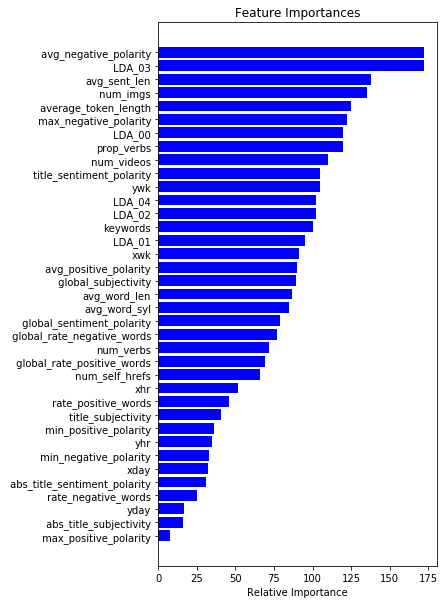

In [0]:
md_lg = lightgbm.LGBMRegressor(random_state = 0)
md_lg.fit(other_features_train, y_train)
features = other_features.columns.tolist()
importances = md_lg.feature_importances_

plt.subplots(figsize=(5, 10))

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();